<a href="https://colab.research.google.com/github/mnab93/diabetes-risk-prediction-ML/blob/main/Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#upload dataset
df=pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233971 entries, 0 to 233970
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          233971 non-null  float64
 1   HighBP                233971 non-null  float64
 2   HighChol              233971 non-null  float64
 3   CholCheck             233970 non-null  float64
 4   BMI                   233970 non-null  float64
 5   Smoker                233970 non-null  float64
 6   Stroke                233970 non-null  float64
 7   HeartDiseaseorAttack  233970 non-null  float64
 8   PhysActivity          233970 non-null  float64
 9   Fruits                233970 non-null  float64
 10  Veggies               233970 non-null  float64
 11  HvyAlcoholConsump     233970 non-null  float64
 12  AnyHealthcare         233970 non-null  float64
 13  NoDocbcCost           233970 non-null  float64
 14  GenHlth               233970 non-null  float64
 15  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,233971.0,0.295344,0.696572,0.0,0.0,0.0,0.0,2.0
HighBP,233971.0,0.428271,0.494829,0.0,0.0,0.0,1.0,1.0
HighChol,233971.0,0.424275,0.494233,0.0,0.0,0.0,1.0,1.0
CholCheck,233970.0,0.962705,0.189485,0.0,1.0,1.0,1.0,1.0
BMI,233970.0,28.388349,6.649230,12.0,24.0,27.0,31.0,98.0
Smoker,233970.0,0.444719,0.496936,0.0,0.0,0.0,1.0,1.0
Stroke,233970.0,0.040800,0.197827,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,233970.0,0.093751,0.291483,0.0,0.0,0.0,0.0,1.0
PhysActivity,233970.0,0.758956,0.427718,0.0,1.0,1.0,1.0,1.0
Fruits,233970.0,0.636646,0.480967,0.0,0.0,1.0,1.0,1.0


In [5]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,1
BMI,1
Smoker,1
Stroke,1
HeartDiseaseorAttack,1
PhysActivity,1
Fruits,1


In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
CholCheck,1
BMI,1
Smoker,1
Stroke,1
HeartDiseaseorAttack,1
PhysActivity,1
Fruits,1
Veggies,1
HvyAlcoholConsump,1
AnyHealthcare,1


In [7]:
#clean data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

df_clean = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)


In [8]:
df_clean.isnull().sum().sum()

np.int64(0)

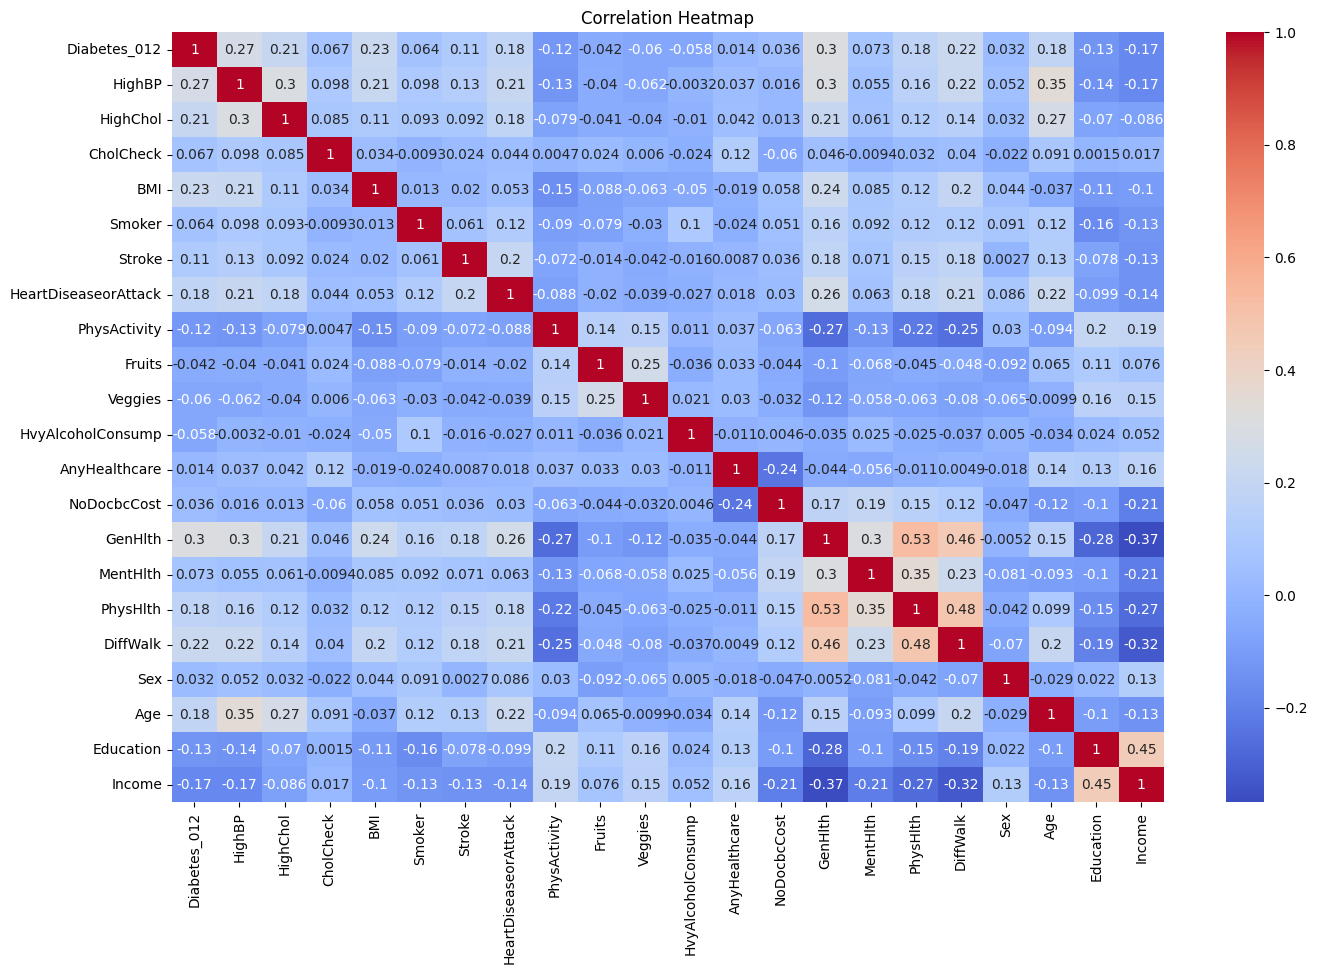

In [10]:
#attributes correlation
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
#split target and feature
x=df_clean.drop('Diabetes_012',axis=1)
y=df_clean['Diabetes_012']

In [12]:
#Stratified Train/Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [15]:
#define and train model baseline(multiclass logistic regression)
from sklearn.linear_model import LogisticRegression
baseline_model=LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    n_jobs=-1
)
baseline_model.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [17]:
#model assessing
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

y_pre = baseline_model.predict(x_test_scaled)
print("balanced accuracy:" , balanced_accuracy_score(y_test,y_pre))
print("\nclassification report:\n")
print(classification_report(y_test,y_pre))


balanced accuracy: 0.38280515343540483

classification report:

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     39458
         1.0       0.00      0.00      0.00       854
         2.0       0.51      0.17      0.26      6483

    accuracy                           0.85     46795
   macro avg       0.46      0.38      0.39     46795
weighted avg       0.80      0.85      0.81     46795



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
